In [1]:
from IPython.display import Image

# Regras de associação

## Definição

Identificar padrões frequentes, associações, correlações entre conjunto de itens ou objetos de um banco de dados transacional, banco de dados relacional ou outro repositório de informação.

## Aplicação

* Análise de cesta de compras

* Marketing

* Projeto de catálogos

* Quais subsequentes compras apos ter comprado um PC ?

* Qual tipo de DNA é sensitivo a uma nova droga ?

* Como classificar um documento web ?

### Definição

* Itens I {i, ..., im } um conjutno de literais denotando itens, com valores binominais { (V, F), (Contem ou não contem), (Teve efeito ou não teve efeito) }

* Itemset X: Conjunto de itens X contido em I

* Database D: Conjunto de transações T, cada transação é um conjunto de itens T que contém I.

* Os itens na transação sçao ordenados

    * Itemset X = (x1, x2, ..., xk), onde x1 <= x2 <= x3 ... xn

* Tamanho de um itemset: número de elementos em um itemset

* k-itemset: itemset de tamanho k.

* Uma regra de associação $X  \xrightarrow[]{} Y $ é um relacionamento do tipo:

    * SE (X) ENTÃO (Y), onde X e Y são conjuntos de itens.

### Suporte

O suporte é um indicador de percentual de vezes que uma regra $A \xrightarrow[]{} B$ acontece nas transações

$sup(A \xrightarrow[]{} B) = \frac{\ número \ de \ transações \ com \ A \ e \ B}{\ número \ total \ de \ transações}$

outra notação:

$sup(A \xrightarrow[]{} B) = P(A \cup B)$

### Confiança

Grau de certeza que o $A \xrightarrow[]{} B$ ocorre.

$conf(A \xrightarrow[]{} B) = \frac{número \ de \ transações \ que \ suportam \  A \ \cup \ B}{\ número \ de \ transações \ que \ suportam \ A}$

Suporte e Confiaça são hiper-parametros em modelos de associação.

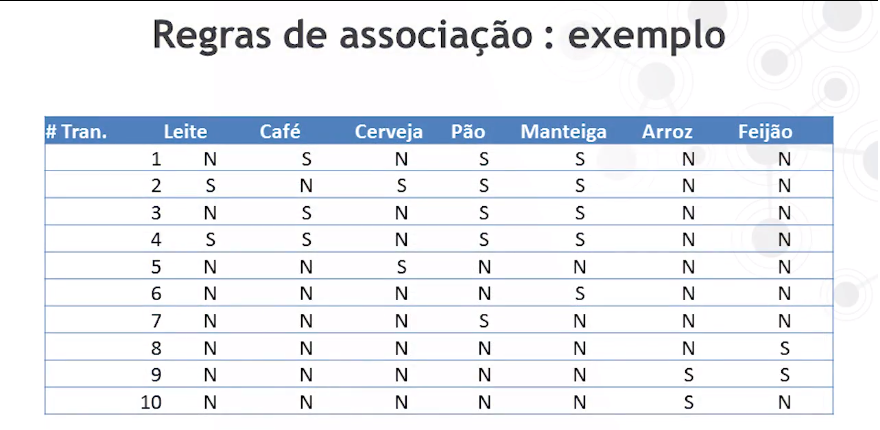

In [3]:
Image('Imagens/regra_associacao2.png')

### Exemplo 1

Suponha que um gerente de um supermercado esteja interessado em conhecer os hábitos de compra de seus clientes, por exemplo:


Exemplo de itens de produto

Produto  |  Id Produto
:--------|:----------:
Pao      | 1
Leite    | 2
Acucar   | 3
Papel Hig| 4
Manteiga | 5
Fralda   | 6
Cerveja  | 7
Regrigerante | 8
Iogurte  | 9
Suco     | 10

Exemplo DB Transação

Num. Transação    |  Itens comprados
:-----------------|:---------------:
T1                | {1,3,5}
T2                | {2,1,3,7,5}
T3                | {4,9,2,1}
T4                | {5,2,1,3,9}
T5                | {1,8,6,4,3,5}
T6                | {9,2,8}


Suponha que um itemset que apareça em pelo menos 50% das transações seja considerado frequente.

Suporte de alguns itemsets

Itemset   |   Suporte
:---------|:----------:
{1, 3}    |  0,6666
{2, 3}    |  0,3333
{1, 2, 7} |  0,1666
{2, 9}    |  0,5


### Regras

Regras $X \ \& \ T \xrightarrow[]{} Z$

* Suporte: probabilidade de uma transação ocorrer {$X \ \cup \ Y  \ \cup \ Z$}

* Confiança: probabilidade condicional de uma transação ter {$ X \ \cup \ Y$} também ter $Z$. 

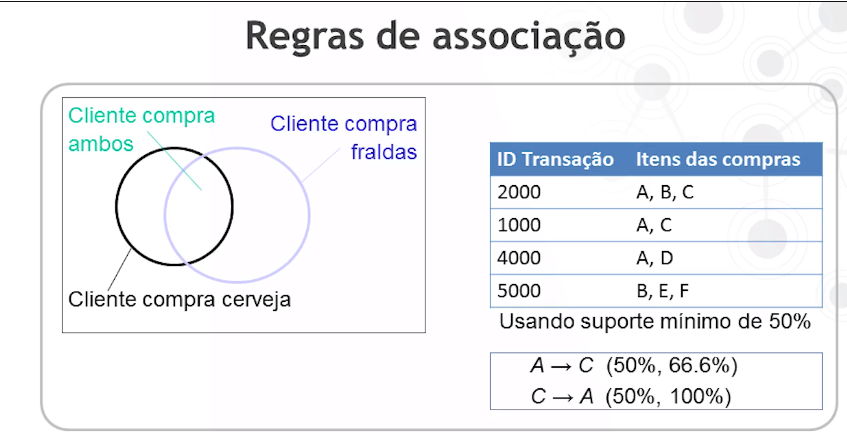

In [4]:
Image('Imagens/regra_associacao.png')

Conjunto de itens frequentes: pão, manteiga. Sup = 0,4

* Regra: SE (pão) ENTÃO (manteiga). Conf. = 0,8

* Regra: SE (manteiga) ENTÃO (pão). Conf. = 0,8

Conjunto de itens frequentes: café, pão, manteiga. Sup = 0,3

* Regra: SE (cafe E pão) ENTÃO (manteiga). Conf = 1

* Regra: SE (cafe E manteiga) ENTÃO (pão). Conf = 1

* Regra: SE (cafe) ENTÃO (manteiga E pão). Conf = 1

## Algoritmos

### Apriori

E baseado na ideia de usar conhecimento já obtido dos itemsets anteriores:

* Fase I: Descobrir todos os conjuntos de itens com suporte maior ou igual ao mínimo suporte especificado pelo usuário.

* Fase II: A partiri dos conjuntos de itens frequentes, descobrir regras associação com fator de confiança maior ou igual ao especificado pelo usuário.

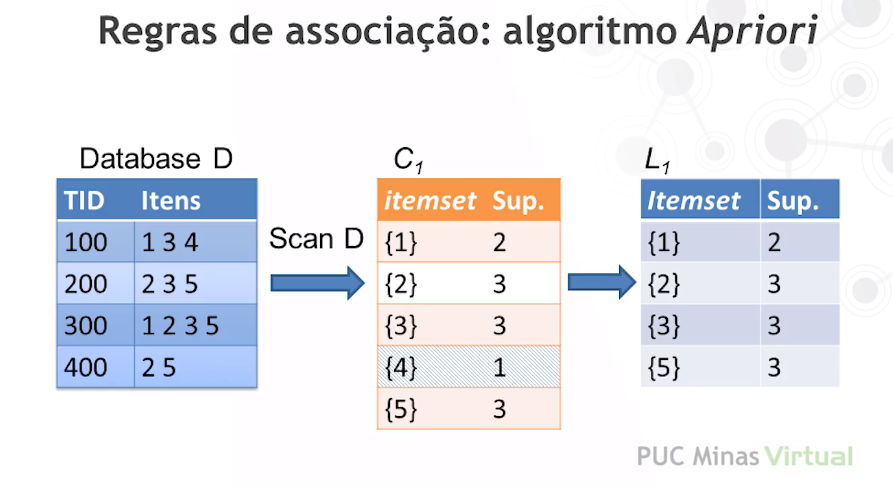

In [6]:
Image('Imagens/apriori1.png')

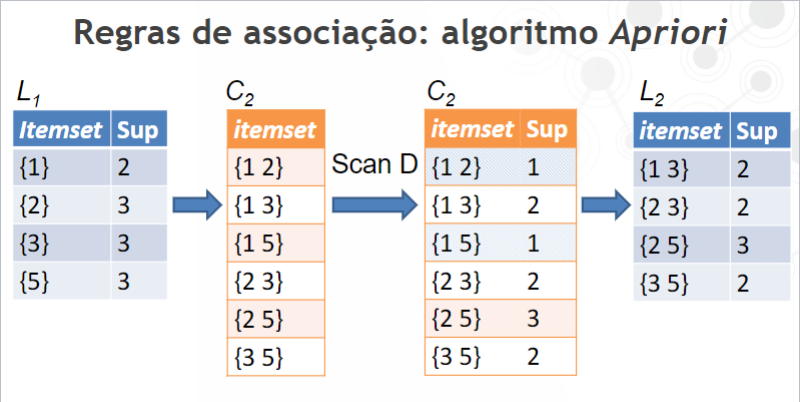

In [7]:
Image('Imagens/apriori2.png')

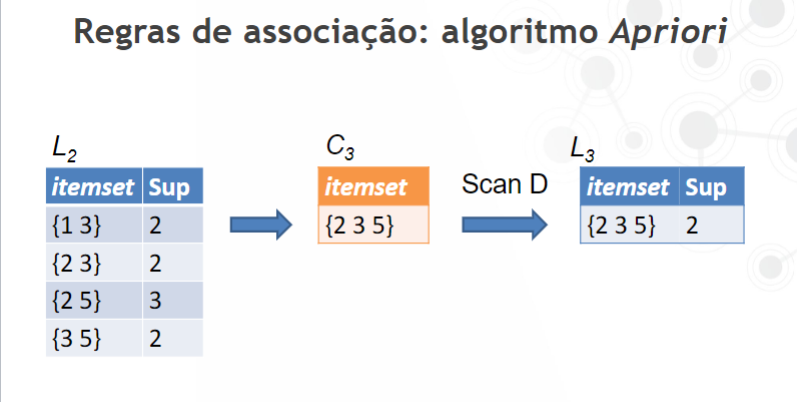

In [8]:
Image('Imagens/apriori3.png')

## Algoritmo FP-growth

Método de *geração de padrões frequentes* de itens sem a geração de candidatos.

Mais eficiente e mais escalável que o algoritmo Apriori.

* Fase I: Construir uma estrutura de dados compactada chamada FP-tree

* Fase II: Extrair itemsets frequentes diretamente da FP-tree.

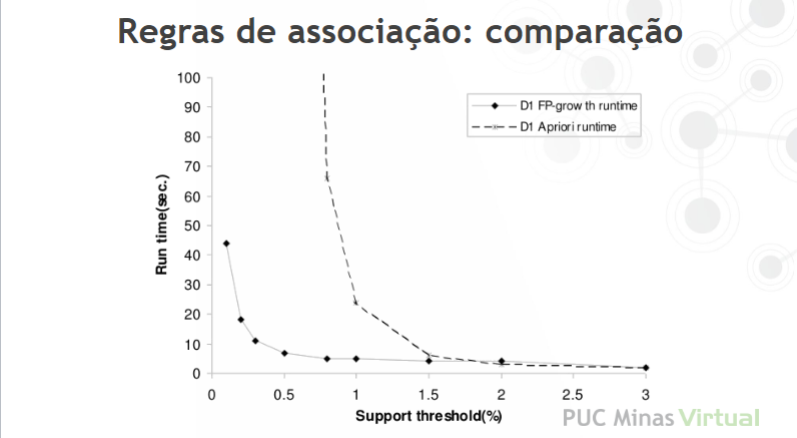

In [9]:
Image('Imagens/apriori X Fp-grow.png')

## Avaliação de regras

Suporte e confiança podem ser altos e a regra não ser útil.

Exemplo: Clientes que compraram leite também compram pão. (sup. 30%, conf. 75%).

Entretanto: Clientes sempre compram pão. (sup. 90%).

### Medida de interesse: *lift*

*lift* indica a força de uma regra sobre a concorrência aleatória de seus antecedentes e consequentes.

$lift(A \xrightarrow[]{} B) = \frac{sup(A \xrightarrow[]{} B)}{sup(A) \ X \ sup(B) }$

Valores inferiores a 1 indicam que a regra não aumenta a probabilidade de se prever uma compra cruzada.

* Supondo que 40 dos clientes compram leite, então lift é 0,83.

* Valores superiores a 1 são relevantes.

### Medidas de interesse: *Convicção*

Assim como confiança, é sensível à direção da regra.

$conv(A \xrightarrow[]{} B) = \frac{1-sup(B)}{1-conf(A \xrightarrow[]{} B)}$

### Medidas de interesse: *Ganho*

Ganho é calculado baseado em um valor $theta$ ($\theta$) dado. Usualmente $\theta$ = 2.0

$ganho(A \xrightarrow[]{} B) = sup(A \ \cup \ B) - \theta * sup(A)$

### Medida de interesse: *Laplace*:

Laplace é calculado baseado em um parâmetro $k$. Usualmente $k$ = 10.

$laplace(A \xrightarrow[]{} B) = \frac{sup(A \xrightarrow[]{} B) + 1}{sup(A) + k}$

### Medida de interesse: *Piatesky-Shapiro (P-S)*

$ps(A \xrightarrow[]{} B) = sup(A \cup B) - sup(A) * sup(B)$

## Regras de associação geradas a partir de itens frequentes

No exemplo a seguir, foi criado um *dataset* transacional formado por uma *lista de listas*, onde cada linha corresponde a um cesto de compras de um supermercado hipotético.

In [7]:
!pip install mlxtend
!pip install xlrd

In [10]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

# Dataset transacional com cesto de compras

dataset = [['Leite', 'Cebola', 'Batata', 'Feijão', 'Ovos', 'Iogurte'],
           ['Arroz', 'Cebola', 'Batata', 'Feijão', 'Ovos', 'Iogurte'],            ['Leite', 'Maçã', 'Feijão', 'Ovos'],
           ['Leite', 'Milho', 'Feijão', 'Iogurte'],
           ['Milho', 'Cebola', 'Feijão', 'Sorvete', 'Ovos']]

te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

print(frequent_itemsets)

support                itemsets
0       0.6                (Cebola)
1       1.0                (Feijão)
2       0.6               (Iogurte)
3       0.6                 (Leite)
4       0.8                  (Ovos)
5       0.6        (Cebola, Feijão)
6       0.6          (Cebola, Ovos)
7       0.6       (Feijão, Iogurte)
8       0.6         (Feijão, Leite)
9       0.8          (Feijão, Ovos)
10      0.6  (Cebola, Feijão, Ovos)


## Regras de associação

Gera regras de associação com confiança mínima de 0.7

In [11]:
association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cebola),(Feijão),0.6,1.0,0.6,1.00,1.00,0.00,inf
1,(Cebola),(Ovos),0.6,0.8,0.6,1.00,1.25,0.12,inf
2,(Ovos),(Cebola),0.8,0.6,0.6,0.75,1.25,0.12,1.6
3,(Iogurte),(Feijão),0.6,1.0,0.6,1.00,1.00,0.00,inf
4,(Leite),(Feijão),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Feijão),(Ovos),1.0,0.8,0.8,0.80,1.00,0.00,1.0
6,(Ovos),(Feijão),0.8,1.0,0.8,1.00,1.00,0.00,inf
7,"(Cebola, Feijão)",(Ovos),0.6,0.8,0.6,1.00,1.25,0.12,inf
8,"(Cebola, Ovos)",(Feijão),0.6,1.0,0.6,1.00,1.00,0.00,inf
9,"(Feijão, Ovos)",(Cebola),0.8,0.6,0.6,0.75,1.25,0.12,1.6


Gerar regras de associação com lift mínimo de 1.2

É importante lembrar que valores de lift inferior a 1 significa que a regra não possui causalidade relevante e não aumenta o nosso poder de previsão

In [16]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
print(rules)

antecedents       consequents  antecedent support  consequent support  \
0          (Cebola)            (Ovos)                 0.6                 0.8   
1            (Ovos)          (Cebola)                 0.8                 0.6   
2  (Cebola, Feijão)            (Ovos)                 0.6                 0.8   
3    (Feijão, Ovos)          (Cebola)                 0.8                 0.6   
4          (Cebola)    (Feijão, Ovos)                 0.6                 0.8   
5            (Ovos)  (Cebola, Feijão)                 0.8                 0.6   

   support  confidence  lift  leverage  conviction  
0      0.6        1.00  1.25      0.12         inf  
1      0.6        0.75  1.25      0.12         1.6  
2      0.6        1.00  1.25      0.12         inf  
3      0.6        0.75  1.25      0.12         1.6  
4      0.6        1.00  1.25      0.12         inf  
5      0.6        0.75  1.25      0.12         1.6  


In [49]:
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
print(rules)

antecedents       consequents  antecedent support  consequent support  \
0          (Cebola)            (Ovos)                 0.6                 0.8   
1            (Ovos)          (Cebola)                 0.8                 0.6   
2  (Cebola, Feijão)            (Ovos)                 0.6                 0.8   
3    (Feijão, Ovos)          (Cebola)                 0.8                 0.6   
4          (Cebola)    (Feijão, Ovos)                 0.6                 0.8   
5            (Ovos)  (Cebola, Feijão)                 0.8                 0.6   

   support  confidence  lift  leverage  conviction  antecedent_len  
0      0.6        1.00  1.25      0.12         inf               1  
1      0.6        0.75  1.25      0.12         1.6               1  
2      0.6        1.00  1.25      0.12         inf               2  
3      0.6        0.75  1.25      0.12         1.6               2  
4      0.6        1.00  1.25      0.12         inf               1  
5      0.6        0.75  1.

Exibe apenas as regras com antecedentes de comprimento maior ou igual a 2 e com confiança superior a 0.75 e lift superior a 1.2

In [26]:
rules.query('antecedent_len >= 2 and confidence > 0.75 and lift > 1.2')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
2,"(Cebola, Feijão)",(Ovos),0.6,0.8,0.6,1.0,1.25,0.12,inf,2


Exibe apenas as regras cujos antecendentes são Feijão e Ovos

In [61]:
rules[rules['antecedents'] == {'Feijão', 'Ovos'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
3,"(Feijão, Ovos)",(Cebola),0.8,0.6,0.6,0.75,1.25,0.12,1.6,2


# Analise de cesta de compras em python

Fonte: Chris Moffitt (2017), Introduction to Market Basket Analysis in Python. http://pbpython.com/market-basket-analysis.html

Neste exemplo é utilizada a base de dados **Online Retail** da UCI, disponivel em [archive.ics.uci.edu/ml/machine-learning-databases/00352/Online Retail](http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx)

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [64]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


## Preparação dos dados

O comando *strip()* elimina espaços no início e fim da string

O comando *dropna()* elimina os registros com valores faltantes (missing values) no campo *InvoiceNo*

O comando *df[~df["InvoiceNo"].str.contains('C')]* remove registros com *InvoiceNo* iniciados com a letra 'C', uma que que esses pedidos correspondem a pedidos cancelados.

In [65]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
print(df.describe())

Quantity  UnitPrice  CustomerID
count  532621.00  532621.00   397924.00
mean       10.24       3.85    15294.32
std       159.59      41.76     1713.17
min     -9600.00  -11062.06    12346.00
25%         1.00       1.25    13969.00
50%         3.00       2.08    15159.00
75%        10.00       4.13    16795.00
max     80995.00   13541.33    18287.00


Gera uma base de dados apenas com pedidos da França. É gerada uma tabela pivô em que cada coluna corresponde à um produto e cada linha corresponde ao somatório da quantidade comprada daquele produto em um determinado pedido

In [67]:
basket = (df[df['Country'] == 'France']
            .groupby(['InvoiceNo', 'Description'])['Quantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('InvoiceNo'))
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,50'S CHRISTMAS GIFT BAG LARGE,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,6PC WOOD PLATE SET DISPOSABLE,72 SWEETHEART FAIRY CAKE CASES,A PRETTY THANK YOU CARD,ABC TREASURE BOOK BOX,ADULT APRON APPLE DELIGHT,ADVENT CALENDAR GINGHAM SACK,AGED GLASS SILVER T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE WORLD CHAMPION,"AIRLINE LOUNGE,METAL SIGN",ALARM CLOCK BAKELIKE CHOCOLATE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,ALARM CLOCK BAKELIKE ORANGE,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ALPHABET HEARTS STICKER SHEET,ALUMINIUM STAMPED HEART,AMETHYST CHUNKY BEAD BRACELET W STR,ANGEL DECORATION STARS ON DRESS,ANTIQUE ALL GLASS CANDLESTICK,ANTIQUE GLASS DRESSING TABLE POT,ANTIQUE GLASS PEDESTAL BOWL,ANTIQUE SILVER BAUBLE LAMP,ANTIQUE SILVER T-LIGHT GLASS,ANTIQUE SILVER TEA GLASS ENGRAVED,APPLE BATH SPONGE,AREA PATROLLED METAL SIGN,ASS COLOUR GLOWING TIARAS,ASS FLORAL PRINT MULTI SCREWDRIVER,ASSORTED BOTTLE TOP MAGNETS,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR MINI CASES,ASSORTED COLOUR T-LIGHT HOLDER,ASSORTED COLOURS SILK FAN,ASSORTED EASTER DECORATIONS BELLS,ASSORTED EASTER GIFT TAGS,"ASSORTED FLOWER COLOUR ""LEIS""",ASSORTED TUTTI FRUTTI BRACELET,ASSORTED TUTTI FRUTTI MIRROR,ASSORTED TUTTI FRUTTI SMALL PURSE,ASSTD DESIGN 3D PAPER STICKERS,ASSTD DESIGN RACING CAR PEN,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,ASSTD RASTA KEY-CHAINS,BABUSHKA LIGHTS STRING OF 10,BAG 125g SWIRLY MARBLES,BAG 250g SWIRLY MARBLES,BAKING MOULD CHOCOLATE CUPCAKES,BAKING MOULD EASTER EGG MILK CHOC,BAKING MOULD EASTER EGG WHITE CHOC,BAKING MOULD HEART MILK CHOCOLATE,BAKING MOULD HEART WHITE CHOCOLATE,BAKING SET 9 PIECE RETROSPOT,BAKING SET SPACEBOY DESIGN,BALLOON ART MAKE YOUR OWN FLOWERS,BALLOON PUMP WITH 10 BALLOONS,BALLOON WATER BOMB PACK OF 35,BALLOONS WRITING SET,BANQUET BIRTHDAY CARD,BASKET OF TOADSTOOLS,BATH BUILDING BLOCK WORD,BEADED CRYSTAL HEART BLUE LARGE,BELLE JARDINIERE CUSHION COVER,BEWARE OF THE CAT METAL SIGN,BIG DOUGHNUT FRIDGE MAGNETS,BILI NUT AND WOOD NECKLACE,BINGO SET,BIRD DECORATION GREEN POLKADOT,BIRD DECORATION RED RETROSPOT,BIRD HOUSE HOT WATER BOTTLE,BIRDS MOBILE VINTAGE DESIGN,"BIRTHDAY CARD, RETRO SPOT",BISCUIT TIN 50'S CHRISTMAS,BISCUIT TIN VINTAGE CHRISTMAS,BISCUIT TIN VINTAGE GREEN,BISCUIT TIN VINTAGE RED,BLACK AND WHITE CAT BOWL,BLACK CANDELABRA T-LIGHT HOLDER,BLACK CHRISTMAS TREE 120CM,BLACK CHUNKY BEAD BRACELET W STRAP,BLACK ENAMEL FLOWER RING,BLACK KITCHEN SCALES,BLACK LOVE BIRD CANDLE,BLACK PIRATE TREASURE CHEST,BLACK RECORD COVER FRAME,BLACK/BLUE POLKADOT UMBRELLA,BLUE 3 PIECE POLKADOT CUTLERY SET,BLUE BIRDHOUSE DECO

## Transforma as quantidade em 0 ou 1

In [68]:
def encode_units(x):
    if x <= 0:
        return 0
    else:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,50'S CHRISTMAS GIFT BAG LARGE,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,6PC WOOD PLATE SET DISPOSABLE,72 SWEETHEART FAIRY CAKE CASES,A PRETTY THANK YOU CARD,ABC TREASURE BOOK BOX,ADULT APRON APPLE DELIGHT,ADVENT CALENDAR GINGHAM SACK,AGED GLASS SILVER T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE WORLD CHAMPION,"AIRLINE LOUNGE,METAL SIGN",ALARM CLOCK BAKELIKE CHOCOLATE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,ALARM CLOCK BAKELIKE ORANGE,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ALPHABET HEARTS STICKER SHEET,ALUMINIUM STAMPED HEART,AMETHYST CHUNKY BEAD BRACELET W STR,ANGEL DECORATION STARS ON DRESS,ANTIQUE ALL GLASS CANDLESTICK,ANTIQUE GLASS DRESSING TABLE POT,ANTIQUE GLASS PEDESTAL BOWL,ANTIQUE SILVER BAUBLE LAMP,ANTIQUE SILVER T-LIGHT GLASS,ANTIQUE SILVER TEA GLASS ENGRAVED,APPLE BATH SPONGE,AREA PATROLLED METAL SIGN,ASS COLOUR GLOWING TIARAS,ASS FLORAL PRINT MULTI SCREWDRIVER,ASSORTED BOTTLE TOP MAGNETS,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR MINI CASES,ASSORTED COLOUR T-LIGHT HOLDER,ASSORTED COLOURS SILK FAN,ASSORTED EASTER DECORATIONS BELLS,ASSORTED EASTER GIFT TAGS,"ASSORTED FLOWER COLOUR ""LEIS""",ASSORTED TUTTI FRUTTI BRACELET,ASSORTED TUTTI FRUTTI MIRROR,ASSORTED TUTTI FRUTTI SMALL PURSE,ASSTD DESIGN 3D PAPER STICKERS,ASSTD DESIGN RACING CAR PEN,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,ASSTD RASTA KEY-CHAINS,BABUSHKA LIGHTS STRING OF 10,BAG 125g SWIRLY MARBLES,BAG 250g SWIRLY MARBLES,BAKING MOULD CHOCOLATE CUPCAKES,BAKING MOULD EASTER EGG MILK CHOC,BAKING MOULD EASTER EGG WHITE CHOC,BAKING MOULD HEART MILK CHOCOLATE,BAKING MOULD HEART WHITE CHOCOLATE,BAKING SET 9 PIECE RETROSPOT,BAKING SET SPACEBOY DESIGN,BALLOON ART MAKE YOUR OWN FLOWERS,BALLOON PUMP WITH 10 BALLOONS,BALLOON WATER BOMB PACK OF 35,BALLOONS WRITING SET,BANQUET BIRTHDAY CARD,BASKET OF TOADSTOOLS,BATH BUILDING BLOCK WORD,BEADED CRYSTAL HEART BLUE LARGE,BELLE JARDINIERE CUSHION COVER,BEWARE OF THE CAT METAL SIGN,BIG DOUGHNUT FRIDGE MAGNETS,BILI NUT AND WOOD NECKLACE,BINGO SET,BIRD DECORATION GREEN POLKADOT,BIRD DECORATION RED RETROSPOT,BIRD HOUSE HOT WATER BOTTLE,BIRDS MOBILE VINTAGE DESIGN,"BIRTHDAY CARD, RETRO SPOT",BISCUIT TIN 50'S CHRISTMAS,BISCUIT TIN VINTAGE CHRISTMAS,BISCUIT TIN VINTAGE GREEN,BISCUIT TIN VINTAGE RED,BLACK AND WHITE CAT BOWL,BLACK CANDELABRA T-LIGHT HOLDER,BLACK CHRISTMAS TREE 120CM,BLACK CHUNKY BEAD BRACELET W STRAP,BLACK ENAMEL FLOWER RING,BLACK KITCHEN SCALES,BLACK LOVE BIRD CANDLE,BLACK PIRATE TREASURE CHEST,BLACK RECORD COVER FRAME,BLACK/BLUE POLKADOT UMBRELLA,BLUE 3 PIECE POLKADOT CUTLERY SET,BLUE BIRDHOUSE DECO

In [69]:
basket_sets.describe()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,50'S CHRISTMAS GIFT BAG LARGE,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,6PC WOOD PLATE SET DISPOSABLE,72 SWEETHEART FAIRY CAKE CASES,A PRETTY THANK YOU CARD,ABC TREASURE BOOK BOX,ADULT APRON APPLE DELIGHT,ADVENT CALENDAR GINGHAM SACK,AGED GLASS SILVER T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE WORLD CHAMPION,"AIRLINE LOUNGE,METAL SIGN",ALARM CLOCK BAKELIKE CHOCOLATE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,ALARM CLOCK BAKELIKE ORANGE,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ALPHABET HEARTS STICKER SHEET,ALUMINIUM STAMPED HEART,AMETHYST CHUNKY BEAD BRACELET W STR,ANGEL DECORATION STARS ON DRESS,ANTIQUE ALL GLASS CANDLESTICK,ANTIQUE GLASS DRESSING TABLE POT,ANTIQUE GLASS PEDESTAL BOWL,ANTIQUE SILVER BAUBLE LAMP,ANTIQUE SILVER T-LIGHT GLASS,ANTIQUE SILVER TEA GLASS ENGRAVED,APPLE BATH SPONGE,AREA PATROLLED METAL SIGN,ASS COLOUR GLOWING TIARAS,ASS FLORAL PRINT MULTI SCREWDRIVER,ASSORTED BOTTLE TOP MAGNETS,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR MINI CASES,ASSORTED COLOUR T-LIGHT HOLDER,ASSORTED COLOURS SILK FAN,ASSORTED EASTER DECORATIONS BELLS,ASSORTED EASTER GIFT TAGS,"ASSORTED FLOWER COLOUR ""LEIS""",ASSORTED TUTTI FRUTTI BRACELET,ASSORTED TUTTI FRUTTI MIRROR,ASSORTED TUTTI FRUTTI SMALL PURSE,ASSTD DESIGN 3D PAPER STICKERS,ASSTD DESIGN RACING CAR PEN,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,ASSTD RASTA KEY-CHAINS,BABUSHKA LIGHTS STRING OF 10,BAG 125g SWIRLY MARBLES,BAG 250g SWIRLY MARBLES,BAKING MOULD CHOCOLATE CUPCAKES,BAKING MOULD EASTER EGG MILK CHOC,BAKING MOULD EASTER EGG WHITE CHOC,BAKING MOULD HEART MILK CHOCOLATE,BAKING MOULD HEART WHITE CHOCOLATE,BAKING SET 9 PIECE RETROSPOT,BAKING SET SPACEBOY DESIGN,BALLOON ART MAKE YOUR OWN FLOWERS,BALLOON PUMP WITH 10 BALLOONS,BALLOON WATER BOMB PACK OF 35,BALLOONS WRITING SET,BANQUET BIRTHDAY CARD,BASKET OF TOADSTOOLS,BATH BUILDING BLOCK WORD,BEADED CRYSTAL HEART BLUE LARGE,BELLE JARDINIERE CUSHION COVER,BEWARE OF THE CAT METAL SIGN,BIG DOUGHNUT FRIDGE MAGNETS,BILI NUT AND WOOD NECKLACE,BINGO SET,BIRD DECORATION GREEN POLKADOT,BIRD DECORATION RED RETROSPOT,BIRD HOUSE HOT WATER BOTTLE,BIRDS MOBILE VINTAGE DESIGN,"BIRTHDAY CARD, RETRO SPOT",BISCUIT TIN 50'S CHRISTMAS,BISCUIT TIN VINTAGE CHRISTMAS,BISCUIT TIN VINTAGE GREEN,BISCUIT TIN VINTAGE RED,BLACK AND WHITE CAT BOWL,BLACK CANDELABRA T-LIGHT HOLDER,BLACK CHRISTMAS TREE 120CM,BLACK CHUNKY BEAD BRACELET W STRAP,BLACK ENAMEL FLOWER RING,BLACK KITCHEN SCALES,BLACK LOVE BIRD CANDLE,BLACK PIRATE TREASURE CHEST,BLACK RECORD COVER FRAME,BLACK/BLUE POLKADOT UMBRELLA,BLUE 3 PIECE POLKADOT CUTLERY SET,BLUE BIRDHOUSE DECO

## Geração de itemsets frequentes e de regras de associação

In [77]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
print(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print('\nAlgumas regras de associações geradas:', rules.head())
print('\nDimensões da matriz de regras geradas', rules.shape)

support                                           itemsets
0      0.07                      (4 TRADITIONAL SPINNING TOPS)
1      0.10                       (ALARM CLOCK BAKELIKE GREEN)
2      0.10                        (ALARM CLOCK BAKELIKE PINK)
3      0.09                         (ALARM CLOCK BAKELIKE RED)
4      0.08                     (BAKING SET 9 PIECE RETROSPOT)
5      0.07                     (CHILDRENS CUTLERY DOLLY GIRL)
6      0.10                             (DOLLY GIRL LUNCH BOX)
7      0.10                          (JUMBO BAG RED RETROSPOT)
8      0.08                       (JUMBO BAG WOODLAND ANIMALS)
9      0.12                           (LUNCH BAG APPLE DESIGN)
10     0.08                      (LUNCH BAG DOLLY GIRL DESIGN)
11     0.15                          (LUNCH BAG RED RETROSPOT)
12     0.12                        (LUNCH BAG SPACEBOY DESIGN)
13     0.12                               (LUNCH BAG WOODLAND)
14     0.14                 (LUNCH BOX WITH CUTLERY RETROSP

## Exemplos de filtros sobre regras de associação


In [76]:
rules.query('lift >= 6 and confidence >= 0.8')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.09,0.10,0.08,0.84,8.64,0.07,5.57
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.10,0.09,0.08,0.82,8.64,0.07,4.92
16,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.13,0.13,0.10,0.80,6.03,0.09,4.34
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.13,0.14,0.12,0.96,6.97,0.10,21.56
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.14,0.13,0.12,0.89,6.97,0.10,7.85
20,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.10,0.14,0.10,0.97,7.08,0.09,34.49
21,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.12,0.13,0.10,0.81,6.12,0.08,4.63
22,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.10,0.13,0.10,0.97,7.64,0.09,34.90


In [78]:
basket['ALARM CLOCK BAKELIKE RED'].sum()

316.0

In [79]:
basket['ALARM CLOCK BAKELIKE GREEN'].sum()

340.0

## Análise de cesto de compras da Alemanha

Esse código é semelhante ao código utilizado para gerar regras da França. O objetivo é mostrar como que o suporte mínimo e a confiança podem variar de uma base para outra. Um país pode ter um perfil de compra mais homogêneo e gerar regras com suporte maior, enquanto outro país pode gerar regras com suporte menor.

In [80]:
basket2 = (df[df['Country'] == 'Germany']
            .groupby(['InvoiceNo', 'Description'])['Quantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('InvoiceNo'))

In [81]:
basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
basket_sets2.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 RED ROSE PEG PLACE SETTINGS,16 PIECE CUTLERY SET PANTRY DESIGN,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 LAVENDER BOTANICAL DINNER CANDLES,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,50'S CHRISTMAS GIFT BAG LARGE,50'S CHRISTMAS PAPER GIFT BAG,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS ELEGANT CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 RIBBONS SHIMMERING PINKS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ABC TREASURE BOOK BOX,ACRYLIC GEOMETRIC LAMP,"ACRYLIC HANGING JEWEL,PINK",ADULT APRON APPLE DELIGHT,ADVENT CALENDAR GINGHAM SACK,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE WORLD CHAMPION,ALARM CLOCK BAKELIKE CHOCOLATE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,ALARM CLOCK BAKELIKE ORANGE,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ALPHABET HEARTS STICKER SHEET,ALPHABET STENCIL CRAFT,ANGEL DECORATION PAINTED ZINC,ANIMAL STICKERS,ANT COPPER LIME BOUDICCA BRACELET,ANT COPPER PINK BOUDICCA BRACELET,ANT COPPER TURQ BOUDICCA BRACELET,ANTIQUE GLASS DRESSING TABLE POT,ANTIQUE GLASS PEDESTAL BOWL,ANTIQUE SILVER T-LIGHT GLASS,APOTHECARY MEASURING JAR,APPLE BATH SPONGE,APRON APPLE DELIGHT,AREA PATROLLED METAL SIGN,ASS FLORAL PRINT MULTI SCREWDRIVER,ASSORTED BOTTLE TOP MAGNETS,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR LIZARD SUCTION HOOK,ASSORTED COLOUR MINI CASES,ASSORTED COLOUR T-LIGHT HOLDER,ASSORTED COLOURS SILK FAN,ASSORTED EASTER DECORATIONS BELLS,ASSORTED EASTER GIFT TAGS,"ASSORTED FLOWER COLOUR ""LEIS""",ASSORTED MONKEY SUCTION CUP HOOK,ASSORTED TUTTI FRUTTI BRACELET,ASSORTED TUTTI FRUTTI PEN,ASSTD DESIGN 3D PAPER STICKERS,ASSTD DESIGN RACING CAR PEN,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,BABUSHKA LIGHTS STRING OF 10,BABY BOOM RIBBONS,BAG 125g SWIRLY MARBLES,BAG 250g SWIRLY MARBLES,BAG 500g SWIRLY MARBLES,BAKING MOULD CHOCOLATE CUPCAKES,BAKING MOULD EASTER EGG WHITE CHOC,BAKING MOULD HEART MILK CHOCOLATE,BAKING MOULD HEART WHITE CHOCOLATE,BAKING MOULD ROSE MILK CHOCOLATE,BAKING MOULD ROSE WHITE CHOCOLATE,BAKING MOULD TOFFEE CUP CHOCOLATE,BAKING SET 9 PIECE RETROSPOT,BAKING SET SPACEBOY DESIGN,BALLOON ART MAKE YOUR OWN FLOWERS,BALLOON PUMP WITH 10 BALLOONS,BALLOON WATER BOMB PACK OF 35,BALLOONS WRITING SET,BANQUET BIRTHDAY CARD,BASKET OF TOADSTOOLS,BATH BUILDING BLOCK WORD,BATHROOM METAL SIGN,BEACH HUT SHELF W 3 DRAWERS,BEADED CHANDELIER T-LIGHT HOLDER,BEADED CRYSTAL HEART GREEN LARGE,BELLE JARDINIERE CUSHION COVER,BEWARE OF THE CAT METAL SIGN,BICYCLE PUNCTURE REPAIR KIT,BIG DOUGHNUT FRIDGE MAGNETS,BILI NUT AND WOOD NECKLACE,BIRD DECORATION GREEN POLKADOT,BIRD DECORATION RED RETROSPOT,BIRD HOUSE HOT WATER BOTTLE,BIRDCAGE DECORATION TEALIGHT HOLDER,BIRDS MOBILE VINTAGE DESIGN,BIRTHDAY BANQUET GIFT WRAP,"BIRTHDAY CARD, RETRO SPOT",BIRTHDAY PARTY

In [84]:
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
print(frequent_itemsets2)

rules2 = association_rules(frequent_itemsets2, metric='lift', min_threshold=1)

rules2.query('lift >= 4 and confidence >= 0.5')


print('\nAlgumas regras de associações geradas:', rules2.head())
print('\nDimensões da matriz de regras geradas', rules2.shape)

support                                           itemsets
0      0.10                           (6 RIBBONS RUSTIC CHARM)
1      0.07                        (ALARM CLOCK BAKELIKE PINK)
2      0.07                      (CHARLOTTE BAG APPLES DESIGN)
3      0.05                     (CHILDRENS CUTLERY DOLLY GIRL)
4      0.06                         (COFFEE MUG APPLES DESIGN)
5      0.06                       (FAWN BLUE HOT WATER BOTTLE)
6      0.07                                (GUMBALL COAT RACK)
7      0.06                             (IVORY KITCHEN SCALES)
8      0.06                            (JAM JAR WITH PINK LID)
9      0.09                           (JAM MAKING SET PRINTED)
10     0.06                                 (JUMBO BAG APPLES)
11     0.08                          (JUMBO BAG RED RETROSPOT)
12     0.10                       (JUMBO BAG WOODLAND ANIMALS)
13     0.06                           (LUNCH BAG APPLE DESIGN)
14     0.08                               (LUNCH BAG WOODLA